# Lab Instructions

You have been hired by a record executive to design a guaranteed smash hit song based on data.  The exec has decided that if you make a song that has all the most popular features of recent songs then it will definitely be a hit.  So if - for example - the most common key in the Spotify data is C# then we would want the song we are designing to also be in C#.  If a "typical" value of BPM is between 120 and 130 then we would want the song we are designing to also have a tempo between 120 and 130 BMP.

Visualize and describe the distribution of:
* BPM
* Key
* Mode
* Danceability
* Energy
* Speechiness
* Acousticness

Based on your visualizations and calculations, what values for each of these features would make a song a guaranteed smash hit?  For quantitative features, you should propose a range of values.

Use a large language model to help you write code to identify if there are any songs in the Spotify dataset that meet all of the criteria we determined.  What is/are the artist(s) and title(s) of the song?  Were any of these songs actually popular?

Pick a song that you know was a smash hit. How do the values of BPM, key, mode, danceability, etc. compare to other songs? 

**Hint:**  Import the Spotify data using `df = pd.read_csv('spotify-2023.csv', encoding='ISO-8859-1')`.

In [8]:
# --- SETUP ---
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('spotify-2023.csv', encoding='ISO-8859-1')

df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,263,45,10,826,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,126,58,14,382,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,207,91,14,949,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,207,125,12,548,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,133,87,15,425,144,A,Minor,65,23,80,14,63,11,6


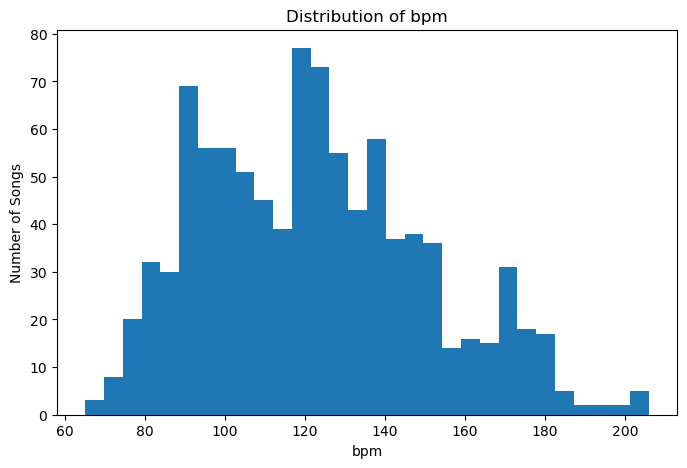

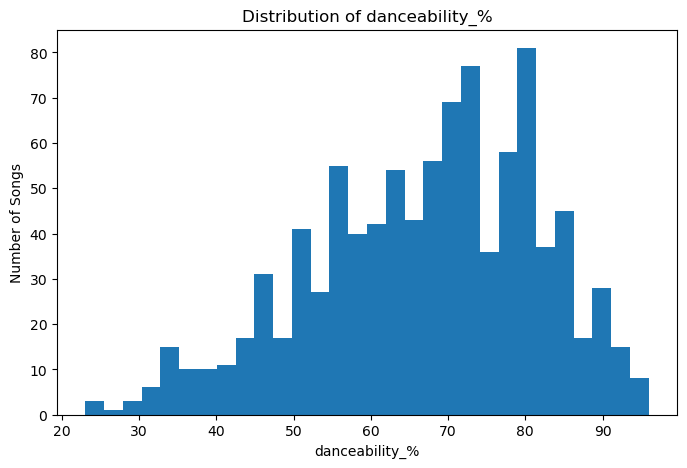

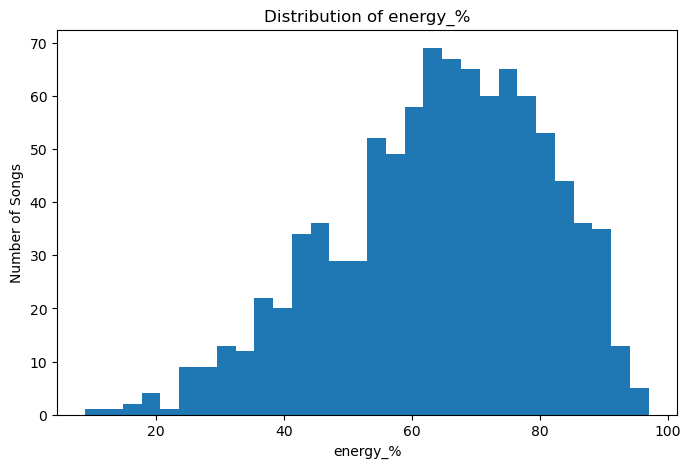

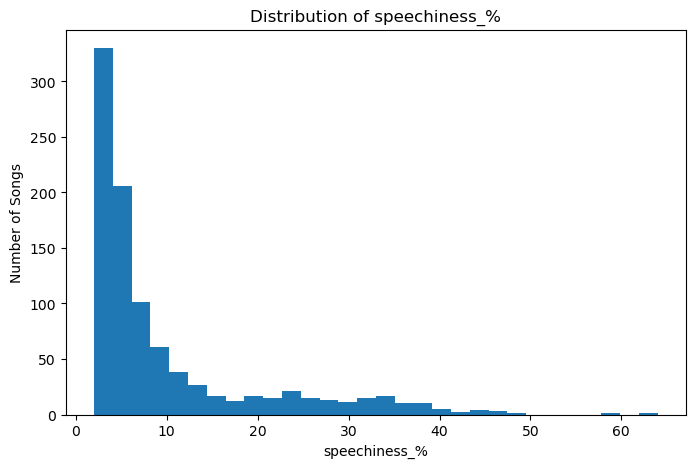

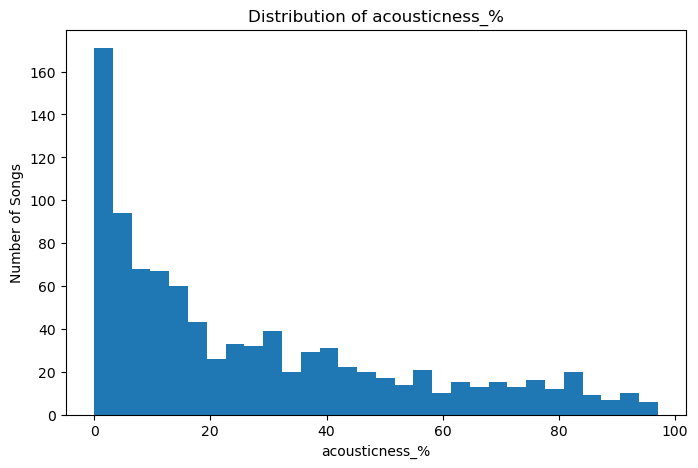

In [9]:
# List of quantitative columns to visualize
quantitative_features = ['bpm', 'danceability_%', 'energy_%', 'speechiness_%', 'acousticness_%']

# Create a histogram for each quantitative feature
for feature in quantitative_features:
    plt.figure(figsize=(8, 5))
    df[feature].plot(kind='hist', bins=30, title=f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Number of Songs')
    plt.show()

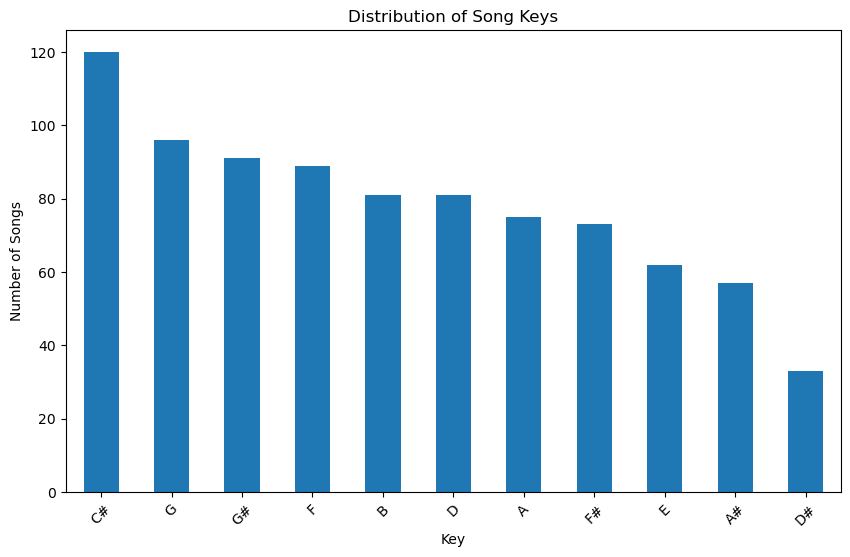

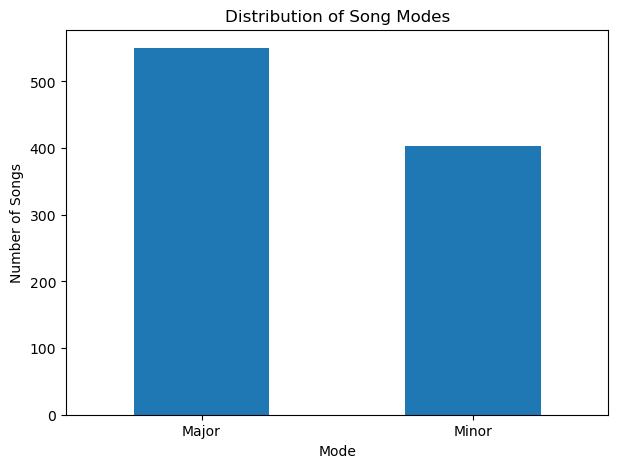

In [10]:
# Visualize the distribution of song keys
plt.figure(figsize=(10, 6))
df['key'].value_counts().plot(kind='bar', title='Distribution of Song Keys')
plt.xlabel('Key')
plt.ylabel('Number of Songs')
plt.xticks(rotation=45)
plt.show()

# Visualize the distribution of song modes
plt.figure(figsize=(7, 5))
df['mode'].value_counts().plot(kind='bar', title='Distribution of Song Modes')
plt.xlabel('Mode')
plt.ylabel('Number of Songs')
plt.xticks(rotation=0)
plt.show()

In [11]:
# --- Define your smash hit criteria here ---
# Example criteria based on common distributions:
bpm_min = 120
bpm_max = 140
key = 'C#'  # C# is often the most common key
mode = 'Major'
danceability_min = 65
danceability_max = 85
energy_min = 60
energy_max = 85
speechiness_max = 10 # Low speechiness is common for hits
acousticness_max = 40 # Low acousticness is common

# Filter the DataFrame based on all criteria
smash_hits_df = df[
    (df['bpm'].between(bpm_min, bpm_max)) &
    (df['key'] == key) &
    (df['mode'] == mode) &
    (df['danceability_%'].between(danceability_min, danceability_max)) &
    (df['energy_%'].between(energy_min, energy_max)) &
    (df['speechiness_%'] <= speechiness_max) &
    (df['acousticness_%'] <= acousticness_max)
]

# Display the songs that match the formula
print(f"Found {len(smash_hits_df)} songs that match the 'smash hit' formula.")
smash_hits_df[['track_name', 'artist(s)_name', 'streams']]

Found 5 songs that match the 'smash hit' formula.


,track_name,artist(s)_name,streams
168,We Found Love,"Rihanna, Calvin Harris",1235005533
236,AMERICA HAS A PROBLEM (feat. Kendrick Lamar),"Kendrick Lamar, Beyoncï¿",57089066
518,Need To Know,Doja Cat,1042568408
600,I WANNA BE YOUR SLAVE,Mï¿½ï¿½ne,851070493
778,Dos Mil 16,Bad Bunny,338422004


In [12]:
# Pick a known hit song to analyze
hit_song_name = 'Cruel Summer'

# Find the song in the DataFrame
hit_song_details = df[df['track_name'] == hit_song_name]

# Display its features
print(f"Details for the smash hit: '{hit_song_name}'")
hit_song_details[['track_name', 'artist(s)_name', 'bpm', 'key', 'mode', 'danceability_%', 'energy_%', 'speechiness_%', 'acousticness_%']]

Details for the smash hit: 'Cruel Summer'


,track_name,artist(s)_name,bpm,key,mode,danceability_%,energy_%,speechiness_%,acousticness_%
3,Cruel Summer,Taylor Swift,170,A,Major,55,72,15,11


In [15]:
# After analyzing Taylor Swift's "Cruel Summer" compared to the other top hits, 
# it demonstrates that while asherence to certain production trends is common, commercially
# successful songs can function as significant outliers. 